# Description of the project

You are an analyst for Megaline, a federal cellular operator. Customers are offered two tariff plans: “Smart” and “Ultra”. To adjust the advertising budget, the commercial department wants to understand which tariff brings in more money.
You will have to do a preliminary analysis of tariffs on a small sample of clients. At your disposal are the data of 500 Megaline users: who they are, where they are from, what tariff they use, how many calls and messages each sent in 2018. You need to analyze customer behavior and draw a conclusion - which tariff is better.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from operator import index

In [2]:
# Read
df_calls = pd.read_csv('calls.csv', index_col=0)
df_internet = pd.read_csv('internet.csv', index_col=0)
df_messages = pd.read_csv('messages.csv', index_col=0)
df_tariffs = pd.read_csv('tariffs.csv', index_col=0)
df_users = pd.read_csv('users.csv', index_col=0)

In [3]:
# Info
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.7+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_internet = df_internet.drop(columns=['Unnamed: 0'])
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [5]:
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
df_tariffs.info()
df_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 144.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Summary

The users table shows that the analysis involves the data of 500 users of different tariffs from different cities. A total of 38 clients stopped using the operator's services. Differentiation occurs according to two tariffs: “Ultra” and “Smart”. For each user, we have information on the number of calls, the duration of calls, the amount of Internet traffic used, the date of messages sent, as well as information on tariffs. The data in different tables is heterogeneous, so it will be necessary to collect all the data into one table using the Merge method. It is also worth noting that gaps are present only in the churn_rate column, which determines the end date of using the tariff.

At this step, we will convert the data to the required types, find and correct errors in the data. Let's also calculate for each user:
number of calls made and conversation minutes used by month;
number of messages sent by month;
volume of consumed Internet traffic by month;
monthly revenue per user

In [8]:
# Create a column for each user in df_users with the month of registration with all possible values
df_users['reg_month'] = df_users['reg_date'].values.astype('datetime64[M]') 
min_month = df_users['reg_date'].values.astype('datetime64[M]').min()
max_month = df_users['reg_date'].values.astype('datetime64[M]').max()
pd.date_range(min_month,max_month,freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [9]:
# Create a DataFrame with all the month values present in the df_users table
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS')) 
dr.columns = ['month']
print(len(df_users)*len(dr))
dr['key'] = 1
df_users['key'] = 1

6000


In [10]:
# Join the table with all month values and the df_users table
df_users_merge = dr.merge(df_users,on='key') 
print('Number of records after processing: ', len(df_users_merge[df_users_merge['month']>=df_users_merge['reg_month']]))

Number of records after processing:  3259


In [11]:
# Let's leave only relevant observations
df_users_merge = df_users_merge[df_users_merge['month'] >= df_users_merge['reg_month']] 

In [12]:
# Translate the month column
df_users_merge['month'] = pd.DatetimeIndex(df_users_merge['month']).month

In [13]:
# Change the column name for further merging
df_users_merge.rename(columns={'tariff': 'tariff_name'}, inplace=True) 
df_users_merge.head() 

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,reg_month
5,1,1,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01
32,1,1,1032,31,NaN,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01
45,1,1,1045,48,NaN,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01
55,1,1,1055,39,NaN,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01
71,1,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01


In [14]:
# Let's translate the month columns, where we select the month from the date
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month 
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [15]:
# Convert the column from MB to GB
df_internet['gb_used'] = df_internet['mb_used'] / 1024 
del df_internet['mb_used']
calls_grouped = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_grouped.set_axis(['number_of_calls', 'call_duration'], axis='columns', inplace=True)                                                                                             
internet_grouped = df_internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='sum')
messages_grouped = df_messages.pivot_table(index=['user_id', 'month'], aggfunc='count')
del messages_grouped['id']
messages_grouped.set_axis(['number_of_messages'], axis='columns', inplace=True)
data_grouped = (calls_grouped, messages_grouped, internet_grouped)
for data in data_grouped:
    data.head(10)

In [16]:
# Group tables
df = (
    calls_grouped.merge(internet_grouped, how='outer', on=('user_id', 'month'))
    .merge(messages_grouped, how='outer', on=('user_id', 'month'))
    .merge(df_users_merge, on=('user_id', 'month'), how='outer')
    .merge(df_tariffs, on='tariff_name', how='outer')
)

In [17]:
df['gb_per_month_included'] = df['mb_per_month_included'] / 1024
del df['mb_per_month_included']
df['number_of_calls'] = df['number_of_calls'].fillna(0)
df['call_duration'] = df['call_duration'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)
df['number_of_messages'] = df['number_of_messages'].fillna(0)
del df['key']
df.head()

,user_id,month,number_of_calls,call_duration,gb_used,number_of_messages,age,churn_date,city,first_name,...,reg_date,tariff_name,reg_month,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22.0,150.06,2.200674,22.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
1,1000,6,43.0,158.90,22.689229,60.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
2,1000,7,47.0,318.80,13.675430,75.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
3,1000,8,52.0,389.87,13.726494,81.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
4,1000,9,58.0,440.14,14.227451,57.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0


In [18]:
df['call_duration'] = df['call_duration'].astype('int')
df['gb_used'] = df['gb_used'].round(2)
df['number_of_messages'] = df['number_of_messages'].astype('int')
df['number_of_calls'] = df['number_of_calls'].astype('int')
df.head()

,user_id,month,number_of_calls,call_duration,gb_used,number_of_messages,age,churn_date,city,first_name,...,reg_date,tariff_name,reg_month,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,22,150,2.20,22,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
1,1000,6,43,158,22.69,60,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
2,1000,7,47,318,13.68,75,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
3,1000,8,52,389,13.73,81,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0
4,1000,9,58,440,14.23,57,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0


In [19]:
print('Total number of observations: ', len(df))
print('Number of duplicates: ', df.duplicated().sum())

Total number of observations:  3259
Number of duplicates:  0


In [20]:
print('Number of missing values by column: ', df.isna().sum())

Number of missing values by column:  user_id                     0
month                       0
number_of_calls             0
call_duration               0
gb_used                     0
number_of_messages          0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
reg_month                   0
messages_included           0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64


In [21]:
def month_calc(row):
    calls = row['call_duration']
    messages = row['number_of_messages']
    internet = row['gb_used']
 
    tariff = row['tariff_name']
 
    minutes_lim = row['minutes_included']
    messages_lim = row['messages_included']
    internet_lim = row['gb_per_month_included']
 
    # overpayment for calls
    call_overlimit = max(calls - minutes_lim, 0)
    call_overpay = call_overlimit * row['rub_per_minute']
 
    # overpayment according to messages
    messages_overlimit = max(messages - messages_lim, 0)
    messages_overpay = messages_overlimit * row['rub_per_message']
 
    # overpayment for Internet traffic
    internet_overlimit = np.ceil(max(internet - internet_lim, 0))   
    internet_overpay = internet_overlimit * row['rub_per_gb']
 
    return (call_overpay + messages_overpay + internet_overpay + row['rub_monthly_fee'])
 
df['month_payment'] = df.apply(month_calc, axis=1)
df['month_payment'] = df['month_payment'].round(2)
df.head()

,user_id,month,number_of_calls,call_duration,gb_used,number_of_messages,age,churn_date,city,first_name,...,tariff_name,reg_month,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,month_payment
0,1000,5,22,150,2.20,22,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0
1,1000,6,43,158,22.69,60,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0
2,1000,7,47,318,13.68,75,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0
3,1000,8,52,389,13.73,81,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0
4,1000,9,58,440,14.23,57,52,NaN,Краснодар,Рафаил,...,ultra,2018-05-01,1000,3000,1950,150,1,1,30.0,1950.0


In [22]:
df_grouped = df.pivot_table(index=['user_id', 'month'], values=['number_of_calls', 'call_duration', 'gb_used', 'number_of_messages', 'month_payment'], aggfunc='sum')
df_grouped.head(15)

call_duration  gb_used  month_payment  number_of_calls  \
user_id month                                                           
1000    5                150     2.20         1950.0               22   
        6                158    22.69         1950.0               43   
        7                318    13.68         1950.0               47   
        8                389    13.73         1950.0               52   
        9                440    14.23         1950.0               58   
        10               328    14.36         1950.0               57   
        11               319    14.41         1950.0               43   
        12               312     9.59         1950.0               46   
1001    11               408    18.00         1150.0               59   
        12               391    13.71          550.0               63   
1002    6                110    10.60          550.0               15   
        7                204    17.17         1150.0               26   
        8                269    19.84         1550.0               42   
        9                195    16.30          950.0               36   
        10               199    13.56          550.0               33   

               number_of_messages  
user_id month                      
1000    5                      22  
        6                      60  
        7                      75  
        8                      81  
        9                      57  
        10                     73  
        11                     58  
        12                     70  
1001    11                      0  
        12                      0  
1002    6                       4  
        7                      11  
        8                      13  
        9                       4  
        10                     10

### Summary

Columns with the month for each user were added to the df_users, df_calls, df_internet, df_messages tables in order to subsequently perform a join using this column. The mb_used column has been converted to a gb_used column.
The calls_grouped, internet_grouped, messages_grouped, report, df_tariffs tables were grouped into the df table. In the columns number_of_calls, call_duration, gb_used, number_of_messages, the missing data was filled in with "0", since this data may not be filled in for several reasons: </br>
1) due to merging tables; </br>
2) due to the fact that the client did not use these services. Both of these reasons allow you to fill in the data with "0". </br>
The data in the number_of_messages, call_duration and number_of_calls columns were cast to the int type, since this data can only be integer. The month_payment column was calculated taking into account tariff recalculations. In the df_grouped table, the total values by month were calculated for each user using the columns call_duration, gb_used month_payment, number_of_calls and number_of_messages.

AxesSubplot(0.125,0.125;0.775x0.755)


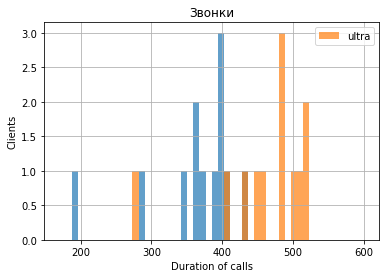

AxesSubplot(0.125,0.125;0.775x0.755)


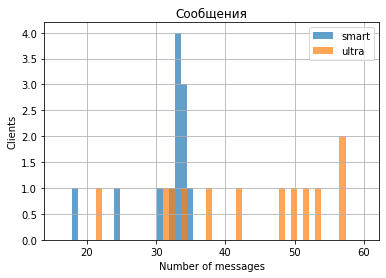

AxesSubplot(0.125,0.125;0.775x0.755)


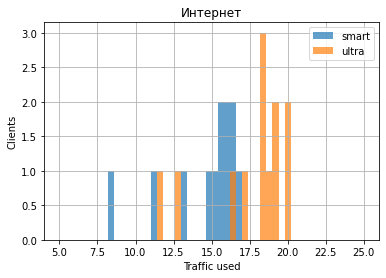

In [23]:
df_smart = df.query('tariff_name == "smart"')
df_ultra = df.query('tariff_name == "ultra"')
df_smart_calls = df_smart.pivot_table(index='month', values='call_duration', aggfunc='mean')
df_smart_messages = df_smart.pivot_table(index='month', values='number_of_messages', aggfunc='mean')
df_smart_internet = df_smart.pivot_table(index='month', values='gb_used', aggfunc='mean')
df_ultra_calls = df_ultra.pivot_table(index='month', values='call_duration', aggfunc='mean')
df_ultra_messages = df_ultra.pivot_table(index='month', values='number_of_messages', aggfunc='mean')
df_ultra_internet = df_ultra.pivot_table(index='month', values='gb_used', aggfunc='mean')
ax_calls = df_smart_calls['call_duration'].plot(kind='hist', y='call_duration', range=(170, 600), bins=50, linewidth=10, alpha=0.7, label='smart')
df_ultra_calls['call_duration'].plot(kind='hist', y='call_duration', range=(170,600), bins=50, linewidth=10, alpha=0.7, label='ultra', ax=ax_calls, grid=True, legend=True, title='Звонки')
_ = plt.xlabel('Duration of calls')
_ = plt.ylabel('Clients')
print(ax_calls)
plt.show()
ax_messages = df_smart_messages.plot(kind='hist', y='number_of_messages', range=(16, 60), bins=50, linewidth=10, alpha=0.7, label='smart')
df_ultra_messages.plot(kind='hist', y='number_of_messages', range=(16,60), bins=50, linewidth=10, alpha=0.7, label='ultra', ax=ax_messages, grid=True, legend=True, title='Сообщения')
_ = plt.xlabel('Number of messages')
_ = plt.ylabel('Clients')
print(ax_messages)
plt.show()
ax_internet = df_smart_internet.plot(kind='hist', y='gb_used', range=(5, 25), bins=50, linewidth=10, alpha=0.7, label='smart')
df_ultra_internet.plot(kind='hist', y='gb_used', range=(5, 25), bins=50, linewidth=10, alpha=0.7, label='ultra', ax=ax_internet, grid=True, legend=True, title='Интернет')
_ = plt.xlabel('Traffic used')
_ = plt.ylabel('Clients')
print(ax_internet)
plt.show()


In [24]:
smart_month_payment = df_smart['month_payment']
smart_month_payment.reset_index(drop=True)
print(smart_month_payment.value_counts())
print('Total number of observations with Smart users:', smart_month_payment.count())

550.0     624
950.0     102
1350.0     85
1150.0     84
750.0      77
         ... 
2080.0      1
2136.0      1
2945.0      1
2085.0      1
1405.0      1
Name: month_payment, Length: 697, dtype: int64
Total number of observations with Smart users: 2253


In [25]:
ultra_month_payment = df_ultra['month_payment']
ultra_month_payment.reset_index(drop=True)
print(ultra_month_payment.value_counts())
print('Total number of observations with Ultra users:', ultra_month_payment.count())

1950.0    872
2250.0     21
2400.0     18
2550.0     13
2100.0     12
2700.0     10
3000.0     10
3750.0      9
3150.0      9
3300.0      9
2850.0      7
3900.0      6
3450.0      4
3600.0      2
4800.0      1
4650.0      1
4200.0      1
4050.0      1
Name: month_payment, dtype: int64
Total number of observations with Ultra users: 1006


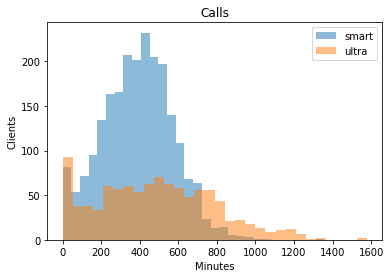

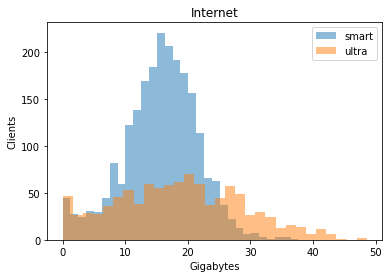

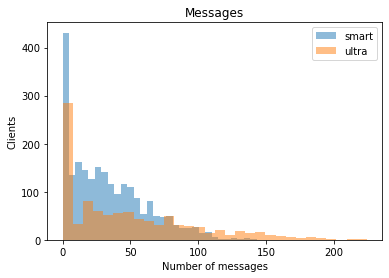

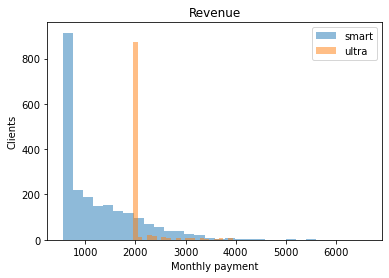

In [26]:
grouped_data = df.pivot_table(index='tariff_name', values=['call_duration', 'gb_used', 'number_of_messages', 'month_payment'], aggfunc=['mean', 'var', 'std'])
grouped_data.columns = ['call_duration_mean', 'gb_used_mean', 'month_payment_mean', 'number_of_messages_mean', 'call_duration_var', 'gb_used_var', 'month_payment_var', 'number_of_messages_var',  'call_duration_std', 'gb_used_std', 'month_payment_std', 'number_of_messages_std', ]
grouped_data

for tariff in ['smart', 'ultra']:
    df.query('tariff_name == @tariff')['call_duration'].plot(kind='hist', bins=30, alpha=0.5)
_ = plt.legend(['smart', 'ultra'])
_ = plt.title('Calls')
_ = plt.xlabel('Minutes')
_ = plt.ylabel('Clients')
plt.show()

for tariff in ['smart', 'ultra']:
    df.query('tariff_name == @tariff')['gb_used'].plot(kind='hist', bins=30, alpha=0.5)
_ = plt.legend(['smart', 'ultra'])
_ = plt.title('Internet')
_ = plt.xlabel('Gigabytes')
_ = plt.ylabel('Clients')
plt.show()

for tariff in ['smart', 'ultra']:
    df.query('tariff_name == @tariff')['number_of_messages'].plot(kind='hist', bins=30, alpha=0.5)
_ = plt.legend(['smart', 'ultra'])
_ = plt.title('Messages')
_ = plt.xlabel('Number of messages')
_ = plt.ylabel('Clients')
plt.show()

for tariff in ['smart', 'ultra']:
    df.query('tariff_name == @tariff')['month_payment'].plot(kind='hist', bins=30, alpha=0.5)
_ = plt.legend(['smart', 'ultra'])
_ = plt.title('Revenue')
_ = plt.xlabel('Monthly payment')
_ = plt.ylabel('Clients')
plt.show()

### Summary

According to the call_duration graph, both tariffs have prominent columns in the region from 0 to 20 minutes/month, there are about 70 such users. The “Smart” tariff has a clear peak in the region of 400 minutes/month, about 240 clients. The distribution of calls for the "Smart" tariff on average goes up to 1000 minus/month, after which the values are extremely rare or stop. While for the “Ultra” tariff, despite the peak around 20 minutes/month, the distribution is uniform with a decrease around 800 minutes/month, while there are users with values of about 1600 minutes/month. Smart tariff users mainly use from 10 to 22 gigabytes per month with a peak around 16 GB/month. Ultra users use traffic more evenly with a peak of about 20 GB/month, but unlike Smart users they use more than 25 GB/month. Users of both tariff plans use about 5-10 messages per month, as evidenced by peaks around 0; there are 402 and 280 such users in the Smart and Ultra tariffs, respectively. For users of the "Smart" tariff, all three indicators - calls, internet and messages - are characterized as graphs with a normal distribution.
According to the Internet traffic graph, it is obvious that users of the Smart tariff usually go beyond the monthly traffic limits, while for other types of communication users usually do not exceed the tariff limits.

In [27]:
var = df.pivot_table(index='tariff_name', values='month_payment', aggfunc='var')
var

,month_payment
tariff_name,
smart,639135.206961
ultra,138855.041393


We have reason to believe that the samples are taken from populations with similar parameters, so the value equal_var=False. We will use the T-student criterion, since the “Smart” tariff corresponds to a normal distribution. </br>

Null hypothesis: the average revenue of users of Ultra and Smart tariffs is equal. </br>
Alternative hypothesis: the average revenue of users of Ultra and Smart tariffs differs.

In [28]:
alpha = 0.05  # critical level of statistical significance
# if the p-value is less than it, we reject the hypothesis

results = st.ttest_ind(smart_month_payment, ultra_month_payment, equal_var=False)

print('p-value: {}'.format(results.pvalue))


if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print('We cannot reject the null hypothesis')

p-value: 1.5505504964270941e-283
Rejecting the null hypothesis


### Summary

It can be concluded that the means of the two sample populations are not equal, as evidenced by the p-value of ~0.0.

Null hypothesis: the average revenue of users from Moscow is equal to the revenue of users from other regions. </br>
Alternative hypothesis: the average revenue of users from Moscow differs from the revenue of users from other regions.

In [29]:
alpha = 0.05  # critical level of statistical significance
# if the p-value is less than it, we reject the hypothesis

results = st.ttest_ind(df.query('city == "Москва"')['month_payment'], df.query('city != "Москва"')['month_payment'], equal_var=False)

print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print('We cannot reject the null hypothesis')

p-value: 0.36701343553970556
We cannot reject the null hypothesis


### Summary

We can conclude that although the averages of the two sample populations for Moscow and other regions are equal, with a probability of almost 37% such or greater differences can be obtained by chance. This is clearly too high a probability to conclude that there is a significant difference between Moscow and the regions.

## Summary

Based on the results of the study, we can conclude that the "Smart" tariff is characterized by lower average indicators compared to the "Ultra" tariff: calls ("Smart": 389.73, "Ultra": 486.22), Internet ("Smart": 15.66, "Ultra" ": 18.62), messages("Smart": 33.03, "Ultra": 48.33). Moreover, people with such a tariff are more likely to overpay for the tariff. This indicates that people with the “Ultra” tariff may be taking the tariff with the expectation of a larger number of minutes and Internet, as well as with the expectation of possible overpayments for the “Smart” tariff. But still, people with the “Smart” tariff usually do not overpay so much as to pay more in total than for the “Ultra” tariff.
872 out of 1006 observations indicate that clients use the “Ultra” tariff without overpaying for overruns, which may indicate that the tariff framework for calls, Internet and messages is comfortable for clients. While only 624 out of 2253 in the “Smart” tariff do not go beyond the monthly fee. Based on this, we can assume that the “Ultra” tariff is the most comfortable tariff for users.
Perhaps the company should slightly reduce the amount of included Internet and calls in the tariff, while lowering the limit on the “Ultra” tariff, then users will want to switch to the “Ultra” tariff, which will entail an increase in average monthly revenue, and, accordingly, an increase in the company’s total revenue . Or slightly increase the fee for tariff overruns, which should lead to the same consequences.